<a href="https://colab.research.google.com/github/MarcSan18/analise_dados_python_alura/blob/main/Analise_dados_python_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
import pandas as pd

In [313]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [314]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [316]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [317]:
df.shape

(133349, 11)

In [318]:
linhas,colunas = df.shape[0], df.shape[1]
print("linhas:",linhas)
print("colunas:",colunas)

linhas: 133349
colunas: 11


In [319]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [320]:
df.columns = ['ano', 'senioridade', 'contrato', 'cargo',
              'salario', 'moeda', 'usd', 'residencia',
              'remoto', 'localizacao', 'tamanho_empresa']
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [321]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [322]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [323]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [324]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [325]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
})

display(df['senioridade'].value_counts())

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [326]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
})

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [327]:
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})

display(df['tamanho_empresa'].value_counts())

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [328]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [329]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [330]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [331]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [332]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [333]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [334]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [335]:
#Dataframe de teste
import numpy as np
df_salarios = pd.DataFrame({
    "nome":["ana", "bruno", "carlos", "daniele", "Marcelo"],
    "salarios":[4000, np.nan, 5000, np.nan, 7000]
    })
# Calcula a media salarial, substitui os nulos e arredonda
df_salarios["salario_media"] = df_salarios["salarios"].fillna(df_salarios["salarios"].mean().round(2))
# Calcula a mediana e substitui os nulos pela mediana
df_salarios["salario_mediana"] = df_salarios["salarios"].fillna(df_salarios["salarios"].median())

display(df_salarios)

,nome,salarios,salario_media,salario_mediana
0,ana,4000.0,4000.00,4000.0
1,bruno,NaN,5333.33,5000.0
2,carlos,5000.0,5000.00,5000.0
3,daniele,NaN,5333.33,5000.0
4,Marcelo,7000.0,7000.00,7000.0


In [336]:
df_temperaturas = pd.DataFrame({
    "dias": ["segunda", "terça", "quarta", "quinta", "sexta"],
    "temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill()
display(df_temperaturas)

,dias,temperatura,preenchido_ffill
0,segunda,30.0,30.0
1,terça,NaN,30.0
2,quarta,NaN,30.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [337]:
df_temperaturas = pd.DataFrame({
    "dias": ["segunda", "terça", "quarta", "quinta", "sexta"],
    "temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["temperatura"].bfill()
display(df_temperaturas)

,dias,temperatura,preenchido_bfill
0,segunda,30.0,30.0
1,terça,NaN,28.0
2,quarta,NaN,28.0
3,quinta,28.0,28.0
4,sexta,27.0,27.0


In [338]:
df_cidades = pd.DataFrame({
    "nome":["ana", "bruno", "carlos", "daniele", "Marcelo"],
    "cidades":["São Paulo", np.nan, "Curitiba", np.nan, "Ilheus"]
})

df_cidades["cidades_preenchidas"] = df_cidades["cidades"].fillna("nâo informado")

display(df_cidades)

,nome,cidades,cidades_preenchidas
0,ana,São Paulo,São Paulo
1,bruno,NaN,nâo informado
2,carlos,Curitiba,Curitiba
3,daniele,NaN,nâo informado
4,Marcelo,Ilheus,Ilheus


In [339]:
df_limpo = df.dropna()
display(df_limpo)

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,Júnior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020.0,Júnior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [340]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [341]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [342]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   localizacao      133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [343]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype(int))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   localizacao      133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [344]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

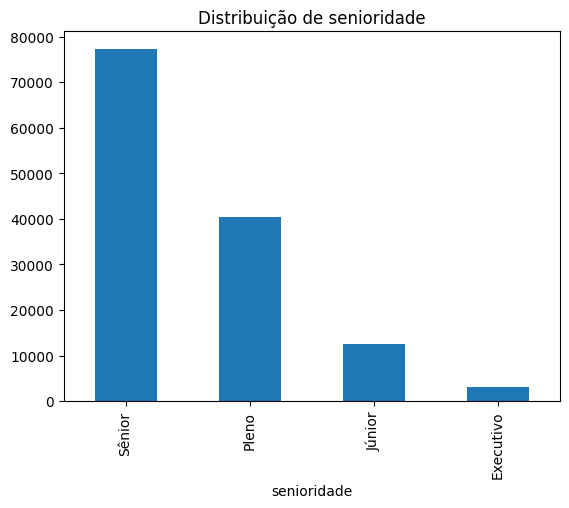

In [345]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title= "Distribuição de senioridade")

<Axes: xlabel='senioridade', ylabel='usd'>

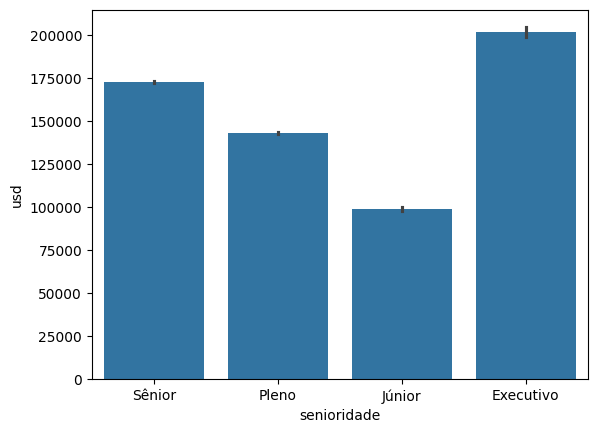

In [346]:
import seaborn as sns
# Get the value counts and plot using seaborn
sns.barplot(data=df_limpo, x="senioridade", y= "usd")

In [347]:
import matplotlib.pyplot as plt

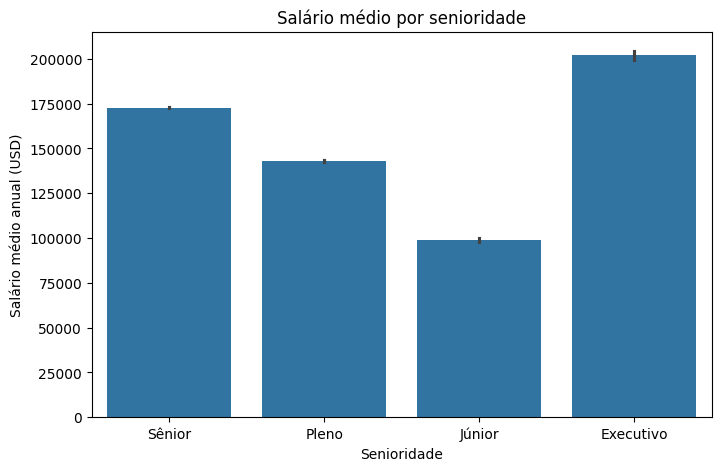

In [348]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y= "usd")
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [349]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)


,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [350]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index

In [351]:
ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='object', name='senioridade')

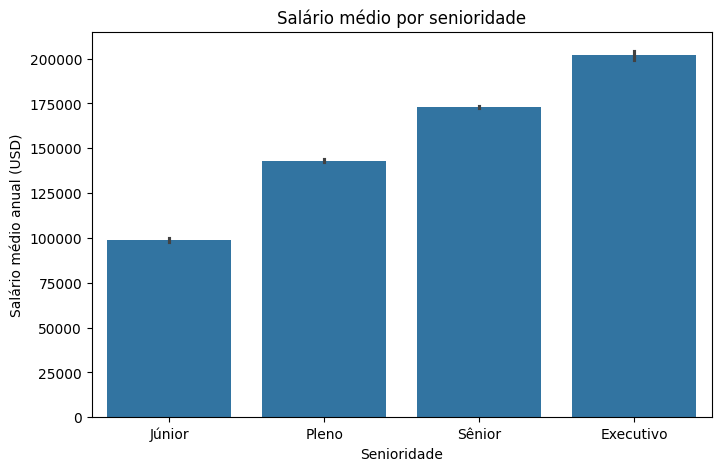

In [352]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y= "usd", order= ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

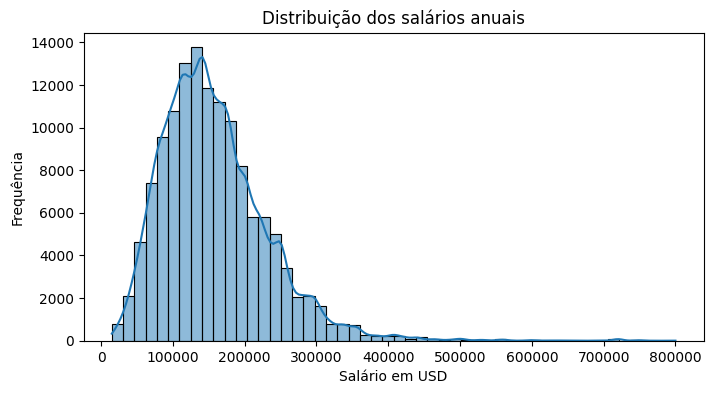

In [353]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_limpo["usd"], bins = 50, kde = True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

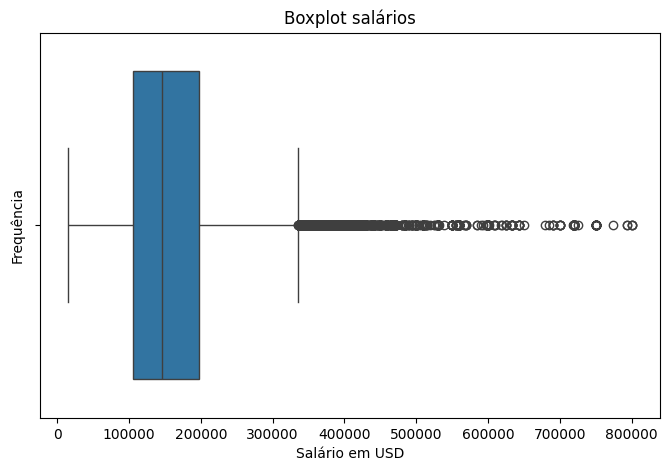

In [354]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= df_limpo["usd"])
plt.title("Boxplot salários")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

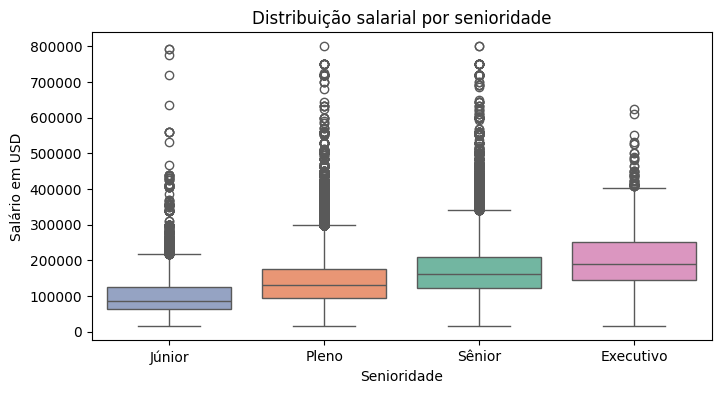

In [355]:
ordem_senioridade = ["Júnior", "Pleno", "Sênior", "Executivo"]
plt.figure(figsize=(8, 4))
sns.boxplot(x = "senioridade", y = "usd", data=df_limpo, order= ordem_senioridade, palette= "Set2", hue="senioridade")
plt.title("Distribuição salarial por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário em USD")
plt.show()

In [356]:
import plotly.express as px

In [357]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [358]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
          )

fig.show()

In [359]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
)

fig.show()

In [360]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5

)
fig.update_traces(textinfo='percent+label')
fig.show()

In [361]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [362]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [363]:
df_limpo.to_csv("dados_final_imersão_alura", index=False)

# Análise de Salários em Cargos de Dados

Este projeto realiza uma análise exploratória de um dataset contendo informações sobre salários em diversas áreas de dados. O objetivo é entender as tendências de salários, os fatores que os influenciam (como nível de experiência, tipo de emprego, localização, etc.) e fornecer insights sobre o mercado de trabalho em dados.

## Ferramentas e Bibliotecas Utilizadas

Nesta análise, foram utilizadas as seguintes ferramentas e bibliotecas Python:

*   **Pandas**: Utilizado para manipulação e análise de dados, incluindo leitura do CSV, limpeza, transformação, agrupamento e cálculo de estatísticas descritivas.
*   **Matplotlib**: Utilizada para a criação de visualizações estáticas, como gráficos de barras e histogramas, para explorar a distribuição de variáveis e as relações entre elas.
*   **Seaborn**: Construída sobre o Matplotlib, foi utilizada para criar visualizações estatísticas mais atraentes e informativas, como box plots, que ajudam a entender a distribuição salarial por diferentes categorias.
*   **Plotly Express**: Uma biblioteca de visualização interativa que permite criar gráficos dinâmicos e interativos, como gráficos de barras e gráficos de pizza, facilitando a exploração dos dados e a identificação de padrões. Também foi utilizada para criar um mapa coroplético para visualizar dados geográficos.
*   **pycountry**: Utilizado para converter códigos de país ISO-2 para ISO-3, o que foi necessário para gerar o mapa coroplético com Plotly.

## Dados

O dataset utilizado neste projeto é o `salaries.csv`, obtido do repositório [https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv](https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv). Ele contém as seguintes colunas:

- `ano_trabalho`: Ano em que o trabalho foi realizado.
- `nivel_experiencia`: Nível de experiência do profissional (Júnior, Pleno, Sênior, Executivo).
- `tipo_emprego`: Tipo de contrato de trabalho (Tempo Integral, Contrato, Tempo Parcial, Freelancer).
- `cargo`: Cargo do profissional.
- `salario`: Salário na moeda local.
- `moeda_salario`: Moeda do salário.
- `salario_em_usd`: Salário convertido para dólares americanos (USD).
- `residencia_empregado`: País de residência do empregado.
- `taxa_remoto`: Percentual de trabalho remoto (0, 50, 100).
- `localizacao_empresa`: País da sede da empresa.
- `tamanho_empresa`: Tamanho da empresa (Pequena, Média, Grande).

## Análise Realizada

As seguintes etapas foram realizadas neste notebook:

1.  **Carregamento dos Dados**: O dataset foi carregado em um DataFrame pandas.
2.  **Exploração Inicial**: Foram verificadas as primeiras linhas do DataFrame (`df.head()`), informações gerais (`df.info()`), estatísticas descritivas (`df.describe()`) e as dimensões do dataset (`df.shape`).
3.  **Tradução de Colunas**: Os nomes das colunas foram traduzidos para português brasileiro.
4.  **Tradução de Categorias**: As categorias das colunas `senioridade`, `contrato`, `tamanho_empresa` e `remoto` foram traduzidas para português.
5.  **Verificação de Valores**: A distribuição dos valores em algumas colunas categóricas foi verificada (`.value_counts()`).
6.  **Tratamento de Valores Ausentes**: As linhas com valores ausentes na coluna 'ano' foram removidas, criando um novo DataFrame `df_limpo`.
7.  **Conversão de Tipo de Dado**: A coluna 'ano' no DataFrame `df_limpo` foi convertida para o tipo inteiro.
8.  **Visualização da Distribuição de Senioridade**: Um gráfico de barras foi gerado para mostrar a distribuição dos níveis de senioridade.
9.  **Análise de Salário por Senioridade**: Gráficos de barras e box plots foram criados para visualizar a relação entre o nível de senioridade e o salário médio em USD. Um gráfico interativo utilizando Plotly também foi gerado para mostrar a média salarial por senioridade, ordenado por nível.
10. **Análise de Salário para Data Scientists por País**: Um gráfico de barras interativo utilizando Plotly foi criado para mostrar o salário médio em USD para cargos de Data Scientist em diferentes países. Um mapa coroplético também foi gerado utilizando pycountry para visualizar o salário médio de Cientistas de Dados por país de residência.
11. **Visualização da Proporção de Tipos de Trabalho**: Gráficos de pizza utilizando Plotly foram gerados para mostrar a proporção de trabalho presencial, remoto e híbrido.
12. **Salvando o DataFrame Limpo**: O DataFrame limpo (`df_limpo`) foi salvo em um arquivo CSV chamado "dados\_final\_imersão\_alura" sem o índice.

## Conclusão

Esta análise inicial forneceu insights valiosos sobre os salários em cargos de dados, destacando a influência do nível de senioridade e a variação salarial entre diferentes países.

## Próximos Passos

Para aprofundar a análise, sugerimos os seguintes passos:

*   Analisar a distribuição dos salários (`salario_em_usd`) por outras categorias, como tipo de emprego e tamanho da empresa.
*   Investigar mais a fundo a relação entre a taxa de trabalho remoto e o salário, considerando outros fatores.
*   Realizar uma análise temporal para verificar a evolução dos salários ao longo dos anos.
*   Explorar os cargos mais comuns e seus respectivos salários, possivelmente agrupando cargos semelhantes.
*   Realizar uma análise de correlação entre as variáveis numéricas.